# CONSTRUCCIÓN DE UN MODELO EN PYTHON

Después de examinar los fundamentos estadísticos de numerosos algoritmos, es hora de dirigir nuestra atención a construir un modelo de aprendizaje automático real.

Aunque hay varias opciones en cuanto a lenguajes de programación (como se describe en el Capítulo 4), para este ejercicio utilizaremos Python porque es rápido de aprender y es un lenguaje de programación eficaz para cualquier persona interesada en manipular y trabajar con grandes conjuntos de datos.

Si no tienes experiencia en programación o en programación con Python, no hay de qué preocuparse. El propósito principal de este capítulo es entender la metodología y los pasos detrás de la construcción de un modelo básico de aprendizaje automático.

En este ejercicio, diseñaremos un sistema de valoración de precios de viviendas utilizando el aumento de gradientes siguiendo estos seis pasos:
1) Configurar el entorno de desarrollo
2) Importar el conjunto de datos
3) Limpiar el conjunto de datos
4) Dividir los datos en datos de entrenamiento y prueba
5) Seleccionar un algoritmo y configurar sus hiperparámetros
6) Evaluar los resultados

### 1) Configurar el entorno de desarrollo

El primer paso es preparar nuestro entorno de desarrollo. Para este ejercicio, trabajaremos en Jupyter Notebook, que es una aplicación web de código abierto que permite editar y compartir cuadernos.

Puedes descargar Jupyter Notebook desde: http://jupyter.org/install.html Jupyter Notebook se puede instalar utilizando la Distribución Anaconda o el gestor de paquetes de Python, pip. Hay instrucciones disponibles en el sitio web de Jupyter Notebook que describen ambas opciones. Como usuario experimentado de Python, es posible que desees instalar Jupyter Notebook a través de pip. Para principiantes, recomiendo seleccionar la opción de Distribución Anaconda, que ofrece una configuración fácil de clic y arrastre. Esta opción de instalación en particular te dirigirá al sitio web de Anaconda.

Desde allí, puedes seleccionar tu instalación preferida para Windows, macOS o Linux. Nuevamente, puedes encontrar instrucciones disponibles en el sitio web de Anaconda según tu elección de sistema operativo.

Después de instalar Anaconda en tu máquina, tendrás acceso a varias aplicaciones de ciencia de datos, incluidas rstudio, Jupyter Notebook y graphviz para visualización de datos. Para este ejercicio, necesitarás seleccionar Jupyter Notebook haciendo clic en "Launch" dentro de la pestaña Jupyter Notebook.

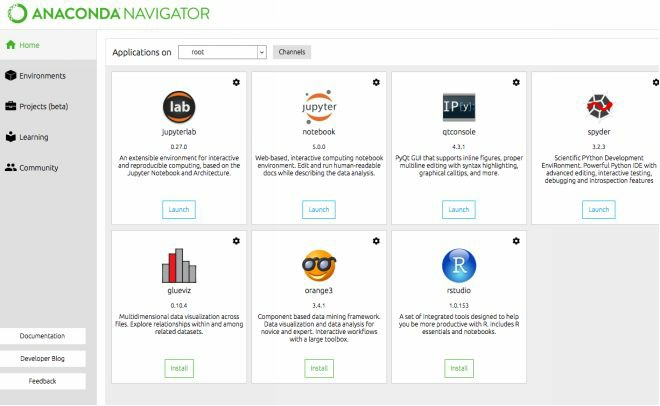

Para iniciar Jupyter Notebook, ejecuta el siguiente comando desde la Terminal (para Mac/Linux) o el Command Prompt (para Windows):

```bash
jupyter notebook
```

La Terminal/Command Prompt generará una URL para que la copies y la pegues en tu navegador web. Ejemplo: http://localhost:8888/ Copia y pega la URL generada en tu navegador web para cargar Jupyter Notebook. Una vez que tengas abierto Jupyter Notebook en tu navegador, haz clic en "New" en la esquina superior derecha de la aplicación web para crear un nuevo proyecto de "Notepad", y luego selecciona "Python 3".

El último paso es instalar las bibliotecas necesarias requeridas para completar este ejercicio. Necesitarás instalar Pandas y una serie de bibliotecas de Scikit-learn en el "notepad".

En el aprendizaje automático, cada proyecto variará en cuanto a las bibliotecas necesarias para la importación. Para este ejercicio en particular, estamos utilizando el aumento de gradientes (ensemble modeling) y el error absoluto medio para medir el rendimiento.

Deberás importar cada una de las siguientes bibliotecas y funciones ingresando estos comandos exactos en Jupyter Notebook:

```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
```

No te preocupes si no reconoces cada una de las bibliotecas importadas en el fragmento de código anterior. Estas bibliotecas se utilizarán en pasos posteriores.

### 2) Importar el conjunto de datos

El siguiente paso es importar el conjunto de datos. Para este ejercicio, he seleccionado un conjunto de datos gratuito y público de kaggle.com que contiene precios de casas, unidades y townhouses en Melbourne, Australia. Este conjunto de datos comprende datos extraídos de listados disponibles públicamente publicados semanalmente en www.domain.com.au. El conjunto de datos contiene 14,242 listados de propiedades y 21 variables, incluyendo dirección, suburbio, tamaño del terreno, cantidad de habitaciones, precio, longitud, latitud, código postal, etc.

Por favor, ten en cuenta que los valores de las propiedades en este conjunto de datos están expresados en dólares australianos; $1 AUD es aproximadamente $0.77 USD (a partir de 2017).

Descarga el conjunto de datos del mercado inmobiliario de Melbourne desde este enlace:
https://www.kaggle.com/anthonypino/melbourne-housing-market

Después de registrar una cuenta gratuita e iniciar sesión en kaggle.com, descarga el conjunto de datos como un archivo zip. Luego, descomprime el archivo descargado e impórtalo en Jupyter Notebook. Para importar el conjunto de datos, puedes utilizar la función `read_csv` para cargar los datos en un dataframe de Pandas.

```python
df = pd.read_csv('~/Downloads/Melbourne_housing_FULL-26-09-2017.csv')
```

Este comando importará directamente el conjunto de datos. Sin embargo, ten en cuenta que la ruta exacta del archivo dependerá de la ubicación guardada de tu conjunto de datos. Por ejemplo, si guardaste el archivo CSV en tu escritorio, deberías leer el archivo .csv utilizando el siguiente comando:

```python
df = pd.read_csv('~/Desktop/Melbourne_housing_FULL-26-09-2017.csv')
```

En mi caso, importé el conjunto de datos desde mi carpeta de Descargas. A medida que avances en el aprendizaje automático y la ciencia de datos, es importante que guardes conjuntos de datos y proyectos en carpetas independientes y con nombres para acceder de manera organizada. Si optas por guardar el archivo .csv en la misma carpeta que tu Jupyter Notebook, no necesitarás agregar un nombre de directorio o "~/".

Luego, para previsualizar el dataframe dentro de Jupyter Notebook, ingresa el siguiente comando, donde "n" representa el número de filas que deseas previsualizar en relación a la fila principal.

```python
df.head(n=5)
```

Haz clic derecho y selecciona "Run" o navega desde el menú de Jupyter Notebook: Cell > Run All.

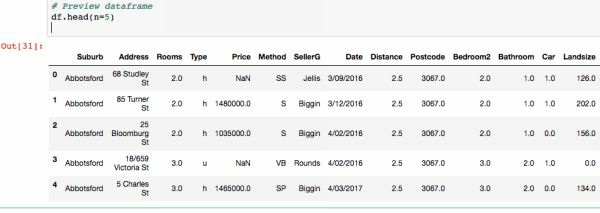

Este paso completará el conjunto de datos dentro de Jupyter Notebook como se muestra en la Figura 2.

Este paso no es obligatorio, pero es una técnica útil para revisar tu conjunto de datos dentro de Jupyter Notebook.

El siguiente paso es limpiar el conjunto de datos. Recuerda que la limpieza es el proceso de refinar tu conjunto de datos. Esto implica modificar o eliminar datos incompletos, irrelevantes o duplicados. También puede implicar la conversión de datos basados en texto a valores numéricos y el rediseño de características.

Es importante tener en cuenta que el proceso de limpieza puede tener lugar antes o después de importar el conjunto de datos en Jupyter Notebook. Por ejemplo, el creador del conjunto de datos del mercado inmobiliario de Melbourne ha escrito incorrectamente "Longitude" y "Latitude" en las columnas iniciales. Como no examinaremos estas dos variables en nuestro ejercicio, no hay necesidad de realizar ningún cambio. Sin embargo, si deseáramos incluir estas dos variables en nuestro modelo, sería prudente corregir este error primero.

Desde una perspectiva de programación, los errores de ortografía en los nombres de las columnas no presentan problemas siempre que apliquemos la misma ortografía de palabra clave para realizar nuestros comandos. Sin embargo, esta incorrecta denominación de columnas podría conducir a errores humanos, especialmente si estás compartiendo tu código con otros miembros del equipo. Para evitar cualquier confusión potencial, es mejor corregir los errores de ortografía y otros errores simples en el archivo fuente antes de importar el conjunto de datos en Jupyter Notebook u otro entorno de desarrollo. Puedes hacer esto abriendo el archivo CSV en Microsoft Excel (u otro programa equivalente), editando el conjunto de datos y luego volviéndolo a guardar como un archivo CSV.

Si bien los errores simples pueden corregirse dentro del archivo fuente, los cambios estructurales importantes en el conjunto de datos, como la ingeniería de características, es mejor realizarlos en el entorno de desarrollo para tener más flexibilidad y preservar el conjunto de datos para su uso posterior. Por ejemplo, en este ejercicio, implementaremos la ingeniería de características para eliminar varias columnas del conjunto de datos, pero más tarde podríamos cambiar de opinión sobre qué columnas deseamos incluir.

Manipular la composición del conjunto de datos en el entorno de desarrollo es menos permanente y generalmente mucho más simple y rápido que hacerlo directamente en el archivo fuente.

#### Proceso de Limpieza

Comencemos por eliminar las columnas del conjunto de datos que no deseamos incluir en el modelo utilizando la función `del df[' ']` e ingresando los títulos de vector (columna) que queremos eliminar.
```python
# Se utilizan los errores de ortografía de "longitude" y "latitude", ya que los dos errores de ortografía no fueron corregidos en el archivo fuente.
del df['Address']
del df['Method']
del df['SellerG']
del df['Date']
del df['Postcode']
del df['Lattitude']
del df['Longtitude']
del df['Regionname']
del df['Propertycount']
```
Las columnas Address, Regionname y Propertycount se eliminaron porque la ubicación de la propiedad está cubierta en otras columnas (Suburb y CouncilArea) y porque queremos minimizar la información no numérica (por ejemplo, Address y Regionname). Postcode, Latitude y Longitude también se eliminaron porque, nuevamente, la ubicación de la propiedad está contenida en las columnas Suburb y CouncilArea.

Mi suposición es que Suburb y CouncilArea tienden a tener más influencia en la mente de los compradores que Postcode, Latitude y Longitude, aunque Address merece una mención honorable.

Method, SellerG y Date también se eliminaron porque se consideró que tienen menos relevancia en comparación con otras variables. Esto no quiere decir que estas variables no impacten en los precios de las propiedades, sino que las otras once variables independientes son suficientes para construir un modelo básico. Podemos decidir agregar cualquiera de estas variables al modelo más tarde, y puedes elegir incluirlas en tu propio modelo.

Las once variables independientes restantes (representadas como X) en el conjunto de datos son Suburb, Rooms, Type, Distance, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt y CouncilArea. La duodécima variable, ubicada en la quinta columna del conjunto de datos descargado, es la variable dependiente, que es Price (representada como y). Como se mencionó, los árboles de decisión (incluyendo el aumento de gradiente y los bosques aleatorios) son hábiles para manejar conjuntos de datos grandes y de alta dimensión con un alto número de variables.

El siguiente paso para limpiar el conjunto de datos es eliminar cualquier valor faltante.

Aunque existen numerosos métodos para manejar valores faltantes (por ejemplo, calcular la media, la mediana o eliminar los valores faltantes por completo), para este ejercicio, queremos mantenerlo lo más simple posible y, por lo tanto, no examinaremos las filas con valores faltantes. La desventaja obvia es que tenemos menos datos para analizar. Como principiante, tiene sentido dominar los conjuntos de datos completos antes de agregar una dimensión adicional de dificultad al intentar lidiar con valores faltantes. ¡Desafortunadamente, en el caso de nuestro conjunto de datos de muestra, sí tenemos muchos valores faltantes! Sin embargo, todavía tenemos suficientes filas disponibles para proceder con la construcción de nuestro modelo.

La siguiente función de Pandas se puede utilizar para eliminar filas con valores faltantes:
```python
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
```
Ten en cuenta que es importante eliminar las filas con valores faltantes después de aplicar la función `del df` para eliminar columnas (como se muestra en el paso anterior). De esta manera, hay una mejor oportunidad de que se preserven más filas del conjunto de datos original. ¡Imagina eliminar toda una fila porque le faltaba el valor de una variable que se eliminaría más tarde como el código postal en nuestro modelo!

A continuación, convertamos las columnas que contienen datos no numéricos en valores numéricos utilizando la codificación one-hot. Con Pandas, la codificación one-hot se puede realizar utilizando la función `get_dummies`:
```python
features_df = pd.get_dummies(df, columns=['Suburb', 'CouncilArea', 'Type'])
```
Este comando convierte los valores de las columnas Suburb, CouncilArea y Type en valores numéricos mediante la aplicación de la codificación one-hot.

A continuación, debemos eliminar la columna "Price" porque esta columna actuará como nuestra variable dependiente (y) y por ahora solo estamos examinando las once variables independientes (X).
```python
del features_df['Price']
```
Finalmente, creamos matrices X e y a partir del conjunto de datos utilizando el tipo de datos matriz (as_matrix). La matriz X contiene las variables independientes y la matriz y contiene la variable dependiente de Price.
```python
X = features_df.as_matrix()
y = df['Price'].as_matrix()
```

#### 4) Dividir el conjunto de datos

Ahora estamos en la etapa de dividir los datos en segmentos de entrenamiento y prueba.

Para este ejercicio, procederemos con una división estándar de 70/30 llamando a la función de Scikit-learn a continuación con un argumento de "0.3". Las filas del conjunto de datos también se mezclan al azar para evitar sesgos utilizando la función random_state.
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
```

#### 5) Seleccionar el algoritmo y configurar sus hiperparámetros

Como recordarás, estamos utilizando el algoritmo de aumento de gradiente para este ejercicio, como se muestra a continuación.
```python
model = ensemble.GradientBoostingRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=30,
    min_samples_split=4,
    min_samples_leaf=6,
    max_features=0.6,
    loss='huber'
)
```
La primera línea es el algoritmo en sí (aumento de gradiente) y comprende solo una línea de código. Las líneas siguientes dictan los hiperparámetros para este algoritmo.

`n_estimators` representa cuántos árboles de decisión construir. Recuerda que un alto número de árboles generalmente mejora la precisión (hasta cierto punto), pero también aumentará el tiempo de procesamiento del modelo. Arriba, he seleccionado 150 árboles de decisión como punto de partida inicial.

`learning_rate` controla la velocidad a la que los árboles de decisión adicionales influyen en la predicción general. Esto efectivamente reduce la contribución de cada árbol por la tasa de aprendizaje establecida. Insertar una tasa baja aquí, como 0.1, debería mejorar la precisión.

`max_depth` define el número máximo de capas (profundidad) para cada árbol de decisión. Si se selecciona "None", entonces los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_leaf. Aquí, he seleccionado un número máximo alto de capas (30), lo que tendrá un efecto dramático en el resultado final, como veremos más adelante.

`min_samples_split` define el número mínimo de muestras requeridas para ejecutar una nueva división binaria. Por ejemplo, `min_samples_split = 10` significa que debe haber diez muestras disponibles para crear una nueva rama.

`min_samples_leaf` representa el número mínimo de muestras que deben aparecer en cada nodo hijo (hoja) antes de que se pueda implementar una nueva rama.

Esto ayuda a mitigar el impacto de valores atípicos y anomalías en forma de un bajo número de muestras encontradas en una hoja como resultado de una división binaria. Por ejemplo, `min_samples_leaf = 4` requiere que haya al menos cuatro muestras disponibles dentro de cada hoja para crear una nueva rama.

`max_features` es el número total de características presentadas al modelo al determinar la mejor división. Como se mencionó en el Capítulo 11, los bosques aleatorios y el aumento de gradiente restringen el número total de características mostradas a cada árbol individual para crear múltiples resultados que se pueden votar más tarde.

Si el valor de max_features es un número entero (número entero), el modelo considerará max_features en cada división (rama). Si el valor es un flotante (por ejemplo, 0.6), entonces max_features es el porcentaje de características totales seleccionadas al azar.

Aunque max_features establece un número máximo de características para considerar en la identificación de la mejor división, las características totales pueden exceder el límite max_features si no se puede realizar inicialmente ninguna división.

`loss` calcula la tasa de error del modelo. Para este ejercicio, estamos usando huber que protege contra valores atípicos y anomalías. Las opciones alternativas de tasa de error incluyen ls (regresión de mínimos cuadrados), lad (desviaciones absolutas mínimas) y quantile (regresión de cuantiles). Huber es en realidad una combinación de ls y lad.

Para obtener más información sobre los hiperparámetros de aumento de gradiente, puedes consultar el sitio web de Scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html Después de imputar los hiperparámetros del modelo, implementaremos la función fit de Scikit-learn para iniciar el proceso de entrenamiento del modelo.
```python
model.fit(X_train, y_train)
```
Finalmente, necesitamos usar Scikit-learn para guardar el modelo de entrenamiento como un archivo utilizando la función joblib.dump, que se importó en Jupyter Notebook en el Paso 1. 

Esto nos permitirá utilizar el modelo de entrenamiento nuevamente en el futuro para predecir nuevos valores de propiedades inmobiliarias, sin necesidad de reconstruir el modelo desde cero.
```python
joblib.dump(model, 'house_tr

#### 6) Evaluar los resultados

Como se mencionó anteriormente, para este ejercicio usaremos el error absoluto medio para evaluar la precisión del modelo.
```python
mse = mean_absolute_error(y_train, model.predict(X_train))
print ("Error Absoluto Medio del Conjunto de Entrenamiento: %.2f" % mse)
```
Aquí, introducimos nuestros valores y, que representan los resultados correctos del conjunto de datos de entrenamiento. Luego, se llama a la función model.predict en el conjunto de entrenamiento X y generará una predicción con hasta dos decimales. La función de error absoluto medio luego comparará la diferencia entre las predicciones esperadas del modelo y los valores reales. El mismo proceso se repite con los datos de prueba.
```python
mse = mean_absolute_error(y_test, model.predict(X_test))
print ("Error Absoluto Medio del Conjunto de Prueba: %.2f" % mse)
```
Ahora ejecutemos todo el modelo haciendo clic derecho y seleccionando "Run" o navegando desde el menú de Jupyter Notebook: Cell > Run All.

Espera unos segundos para que la computadora procese el modelo de entrenamiento. Los resultados, como se muestran a continuación, aparecerán en la parte inferior del cuaderno.
```python
Error Absoluto Medio del Conjunto de Entrenamiento: 27157.02
Error Absoluto Medio del Conjunto de Prueba: 169962.99
```
Para este ejercicio, nuestro error absoluto medio del conjunto de entrenamiento es de $27,157.02 y el del conjunto de prueba es de $169,962.99. Esto significa que, en promedio, el conjunto de entrenamiento calculó de manera incorrecta el valor real de la propiedad por apenas $27,157.02.

Sin embargo, el conjunto de prueba calculó de manera incorrecta por un promedio de $169,962.99.

Esto significa que nuestro modelo de entrenamiento fue muy preciso para predecir el valor real de las propiedades contenidas en los datos de entrenamiento. Aunque $27,157.02 puede parecer mucho dinero, este valor de error promedio es bajo dada la gama máxima de nuestro conjunto de datos es de $8 millones. Como muchas de las propiedades en el conjunto de datos son superiores a los siete dígitos ($1,000,000+), $27,157.02 constituye una tasa de error razonablemente baja.

¿Pero cómo le fue al modelo con los datos de prueba? Estos resultados son menos precisos.

Los datos de prueba proporcionaron predicciones menos indicativas con una tasa de error promedio de $169,962.99. Una gran discrepancia entre los datos de entrenamiento y prueba suele ser un indicador clave de sobreajuste. Como nuestro modelo está adaptado a los datos de entrenamiento, tuvo problemas para predecir los datos de prueba, que probablemente contienen nuevos patrones para los que el modelo no se ha ajustado. Los datos de prueba, por supuesto, es probable que contengan patrones ligeramente diferentes y nuevos posibles valores atípicos y anomalías.

Sin embargo, en este caso, la diferencia entre los datos de entrenamiento y prueba se ve exacerbada por el hecho de que configuramos el modelo para sobreajustar los datos de entrenamiento. Un ejemplo de este problema fue establecer max_depth en "30". Aunque establecer un max_depth alto mejora las posibilidades de que el modelo encuentre patrones en los datos de entrenamiento, tiende a provocar sobreajuste. Otra posible causa es una división deficiente de los datos de entrenamiento y prueba, pero para este modelo los datos se aleatorizaron usando Scikit-learn.

Por último, ten en cuenta que debido a que los datos de entrenamiento y prueba se barajan al azar, tus propios resultados diferirán ligeramente al replicar este modelo en tu propia máquina.